In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.font_manager
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib import cm

from shapely import geometry
from descartes import PolygonPatch

from PIL import Image

In [2]:
from aux_func_States import getLegend
from aux_func_States import equals
from aux_func_States import getStates
from aux_func_States import getCompHybridVal

from plottingFunctions import *

In [3]:
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'

# Figure 1

##### Caption for Fig. 1

The coupled EMT/MR circuit results in 9 coupled steady states. (A) The network showing the core EMT module (bottom) with regulatory links designated by black, the core metabolic circuit (top) with regulatory links designated by blue, and the crosstalks noted in red. The dashed lines denote miRNA regulation rather than transcriptional. (B) The 9 possible coupled states when all crosstalks are present but inactive. (C) The percent of initial conditions leading to either E, M, or E/M phenotypes for increasing numbers of initial conditions shows minor changes as the number of initial conditions increases. (D) Same as (C) for the W, O, and W/O metabolic phenotypes.

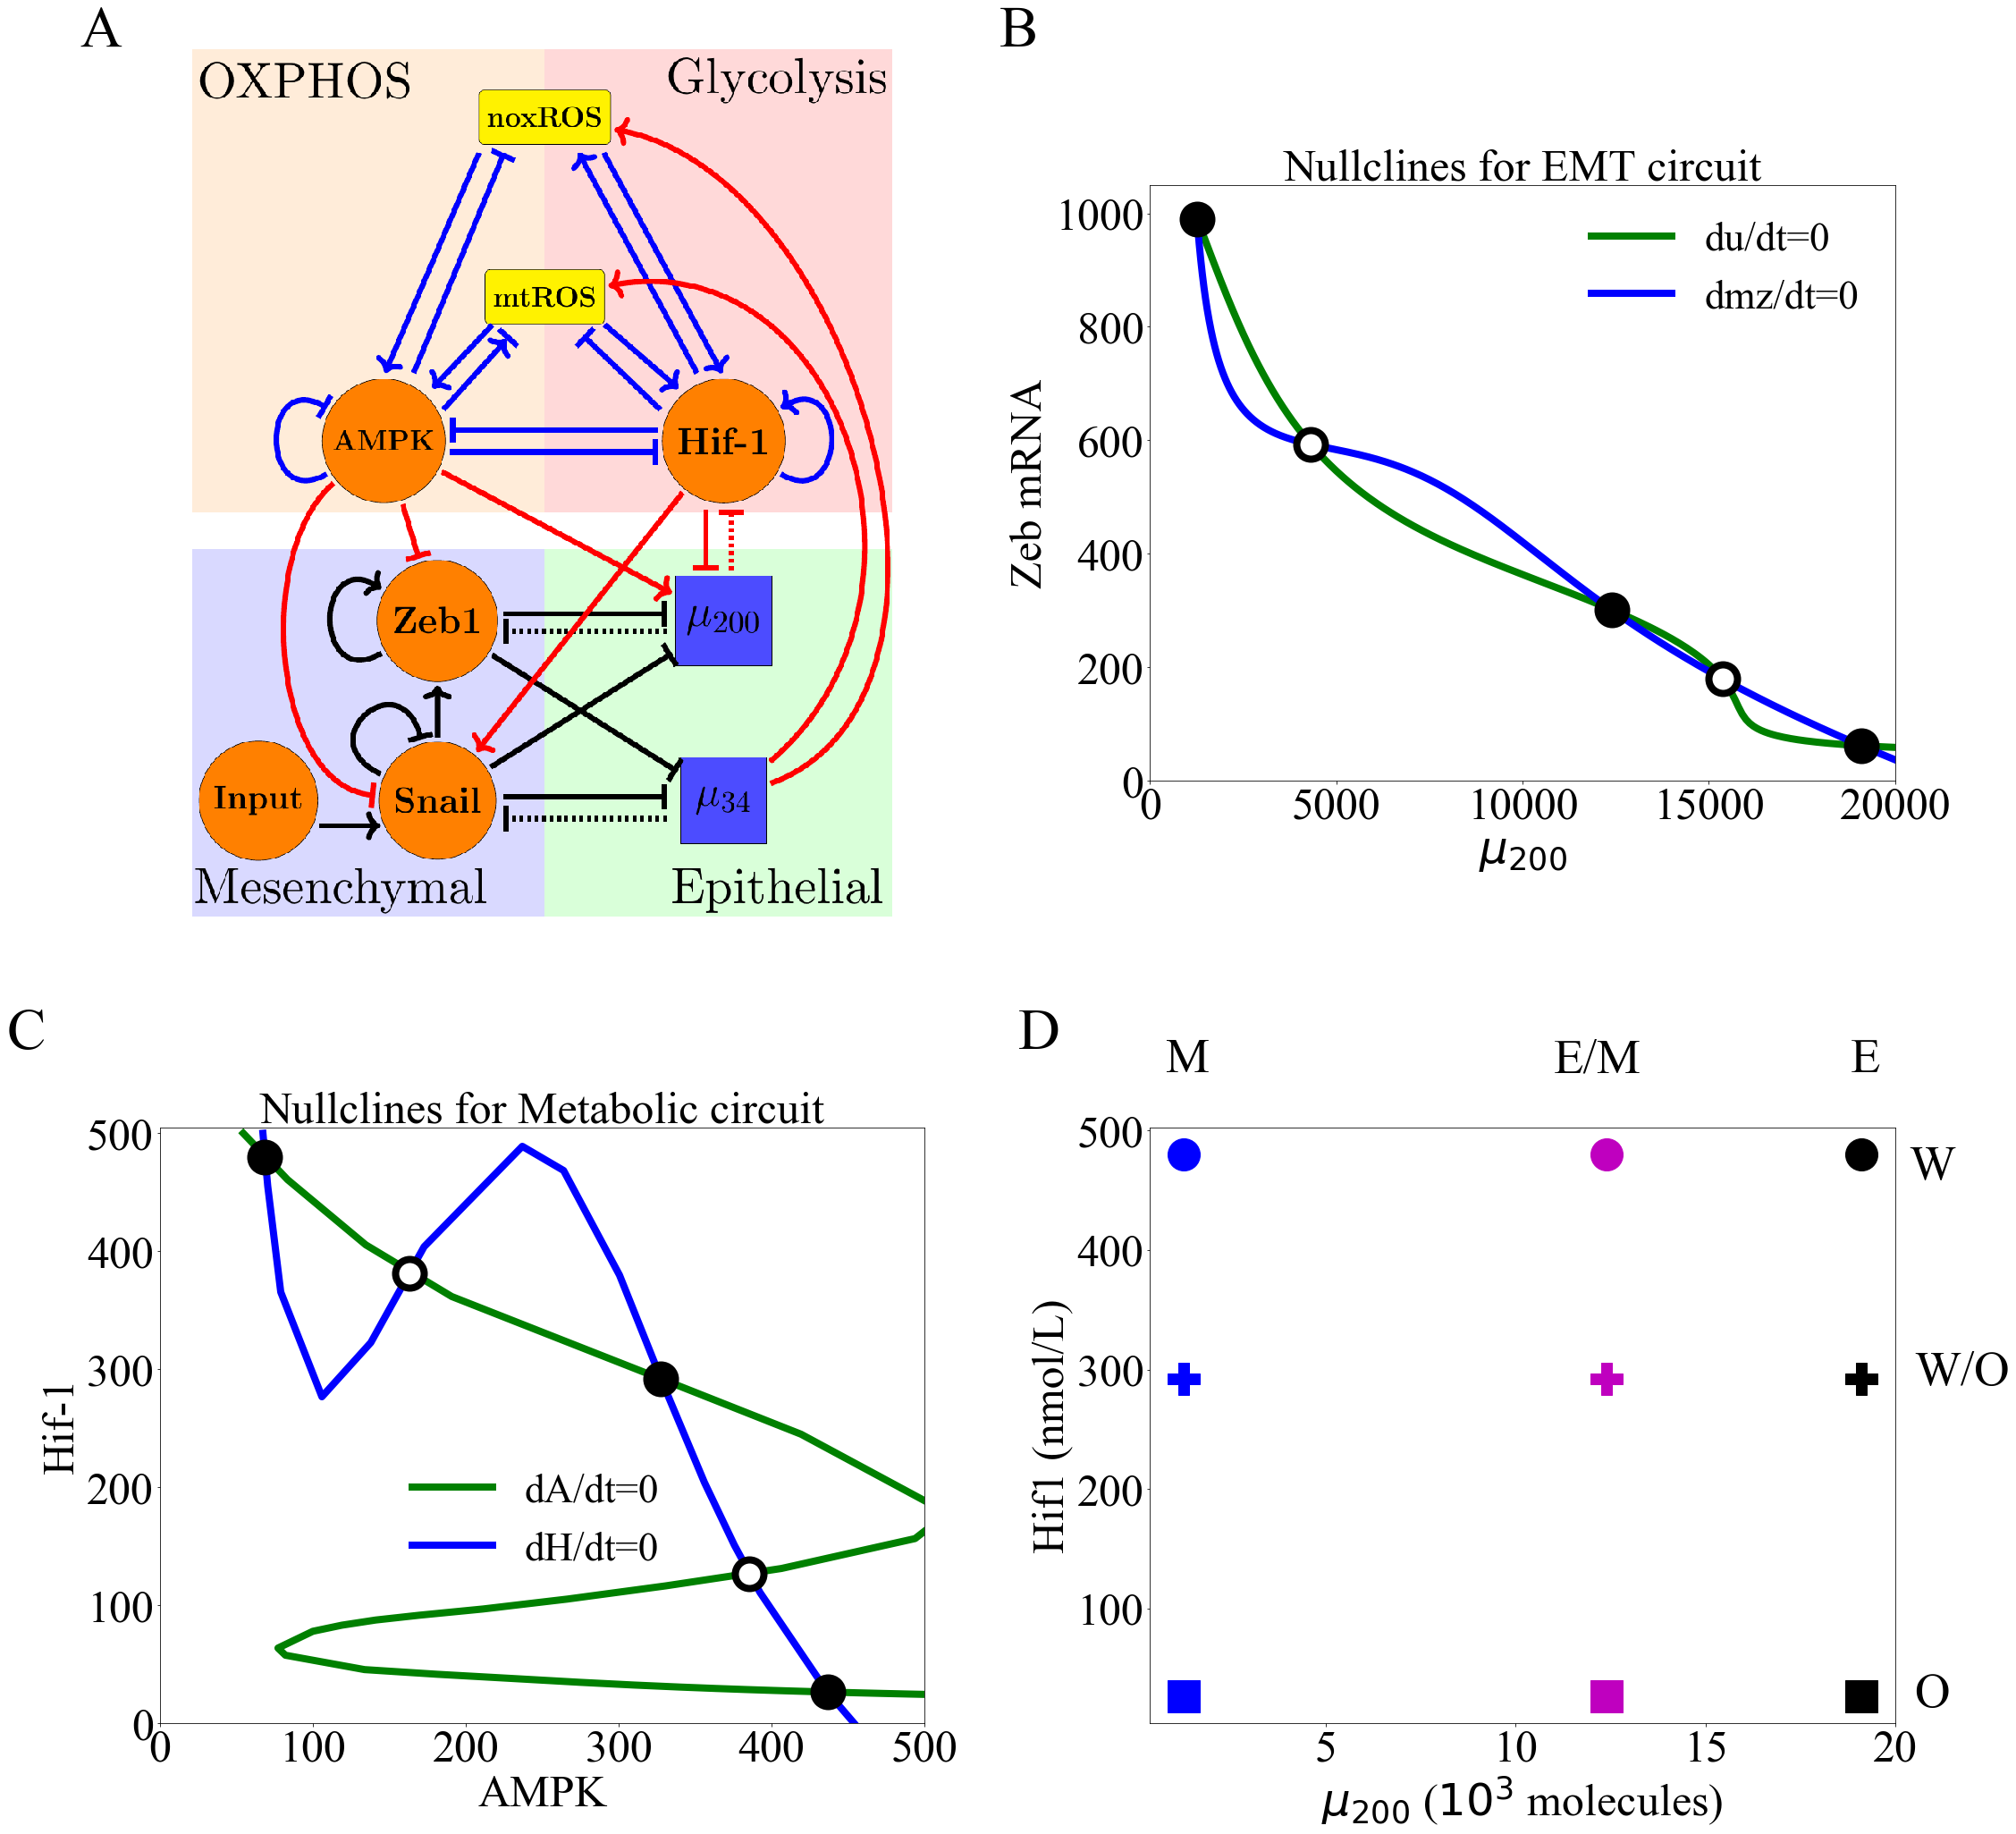

In [4]:
fig = plt.figure(figsize=(8,13))
gs1 = gridspec.GridSpec(5,5, height_ratios=[0.2,1,0.2,0.3,1], width_ratios=[0.3,0.3,0.5,0.2,0.8])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=2,bottom=0)
fs =50
matplotlib.rcParams.update({'font.size':fs})

###############################
###############################
###############################
###############################
###############################
ax1a = plt.subplot(gs1[:3,1:3])
img = Image.open('network.png')
#img.resize((8000,8000))
a = np.asarray(img)
ax1a.imshow(a)
ax1a.axis("off")
ax1a.text(-0.1, 1.05, 'A',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)


ax1a = plt.subplot(gs1[1,4])
    
df_nullU=pd.read_csv("nullU_emt.txt")
df_nullZ=pd.read_csv("nullMZ_emt.txt")
df_fp=pd.read_csv("EMW_fp.txt")

ax1a.plot(df_nullU['u'],df_nullU['mz'],'g',label='du/dt=0',linewidth=8)
ax1a.plot(df_nullZ['u'],df_nullZ['mz'],'b',label='dmz/dt=0',lw=8)
ax1a.legend(frameon=False,fontsize=fs-5)
colors=['k','k','w','k','w']
for i in range(len(df_fp['u'])):
    ax1a.plot(df_fp['u'][i],df_fp['mz'][i],marker='o',color=colors[i],markeredgecolor='k',markersize=32,markeredgewidth=8)
ax1a.set_xlabel("$\mu_{200}$")
ax1a.set_ylabel("Zeb mRNA")
ax1a.set_xlim(0,20000)
ax1a.set_ylim(0,1050)
ax1a.set_title("Nullclines for EMT circuit",fontsize=fs)
ax1a.text(-0.15, 1.3, 'B',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)
###############3
##############
ax1a = plt.subplot(gs1[4,1:3])
    
df_nullA=pd.read_csv("nullA_mr.txt")
df_nullH=pd.read_csv("nullh_mr.txt")
df_fp=pd.read_csv("MR_fp.txt")

ax1a.plot(df_nullA['A'],df_nullA['h'],'g',label='dA/dt=0',linewidth=8)
ax1a.plot(df_nullH['A'],df_nullH['h'],'b',label='dH/dt=0',lw=8)
ax1a.legend(frameon=False,fontsize=fs-5,bbox_to_anchor=(0.7,0.2))
colors=['k','k','k','w','w']
for i in range(len(df_fp['A'])):
    ax1a.plot(df_fp['A'][i],df_fp['h'][i],marker='o',color=colors[i],markeredgecolor='k',markersize=32,markeredgewidth=8)
ax1a.set_xlabel("AMPK")
ax1a.set_ylabel("Hif-1")
ax1a.set_xlim(0,500)
ax1a.set_ylim(0,505)
ax1a.set_title("Nullclines for Metabolic circuit",fontsize=fs)
ax1a.text(-0.15, 1.2, 'C',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)



ax1b = plt.subplot(gs1[4,4])
df1b = pd.read_csv("data_1b.txt")
leb=[]
for i in range(len(df1b)):
    ax1b.plot(df1b['u'][i]/1000.,df1b['h'][i],'o',color=df1b['color'][i],marker=df1b['marker'][i],markersize=36,label=df1b['label'][i])
#ax1b.legend(  bbox_to_anchor=(1.1, 1.05), loc='upper left',frameon=False)
ax1b.set_xlabel("$\mu_{200}$ ($10^3$ molecules)")
ax1b.set_ylabel("Hif1 (nmol/L)")
ax1b.text(-0.12, 1.2, 'D',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)
#ax1b.text(1, -.35, '$d_i^2 = \sum_{j=0}^N (X_i-UC_j)^2$',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)

ax1b.text(0.05, 1.15, 'M',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs+5)
ax1b.text(0.6, 1.15, 'E/M',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs+5)
ax1b.text(0.96, 1.15, 'E',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs+5)

ax1b.text(1.05, 0.085, 'O',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs+5)
ax1b.text(1.09, 0.625, 'W/O',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs+5)
ax1b.text(1.05, 0.97, 'W',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs+5)


fig.savefig("Figure1.png",bbox_inches='tight')#,dpi=300)

# FIgure 2


##### Caption for Figure 2

Figure 2. noxROS upregulated by mir34 results in upregulated W/O phenotype and associated with upregulated E/M-W/O phenotype. (A) A diagram of the core EMT circuit (left) and the core metabolic circuit (right) connected by the crosstalk between $\mu_{34}$ upregulating noxROS (red link representing transcriptional regulation). (B) Of the nine possible coupled states, as noxROS is upregulated by mir34, there are 4 distinct groupings. All possible coupling of the EMT circuit phenotypes (E, M, and E/M) with both the O and W/O metabolic phenotypes persist for all levels of noxROS upregulation. The coupled states associated with the W metabolic phenotypes, (E-W, E/M-W, and M-W), are lost as the level of noxROS regulation increases for the blue, green, and grey regions, respectively. (C) The background colors correpond to the colors representing the possible steady states of (B). The lines represent the total number of initial conditions leading to the W, O, or W/O phenotypes as a function of increasing regulation of noxROS by mir34. The W/O phenotype is upregulated, W phenotype is downregulated, and O is unchanged. (D) Showing the breakdown of the coupled states associated with the W/O phenotype (i.e., E-W/O, M-W/O, and E/M-W/O). The E/M-W/O coupled state is greatly upregulated once $\lambda_{\mu_{34}}=0.5$ while the M-W/O coupled state is only slightly upregulated, and no change is seen for E-W/O coupled state. (E) Same as (d) but for the coupled states associated with the Warburg phenotype. Once $\lambda_{\mu_{34}}=0.5$, both the E-W and M-W states are fully suppressed. The E/M-W coupled state continues to be downregulated until it is fully suppressed near $\lambda_{\mu_{34}}=0.1$.

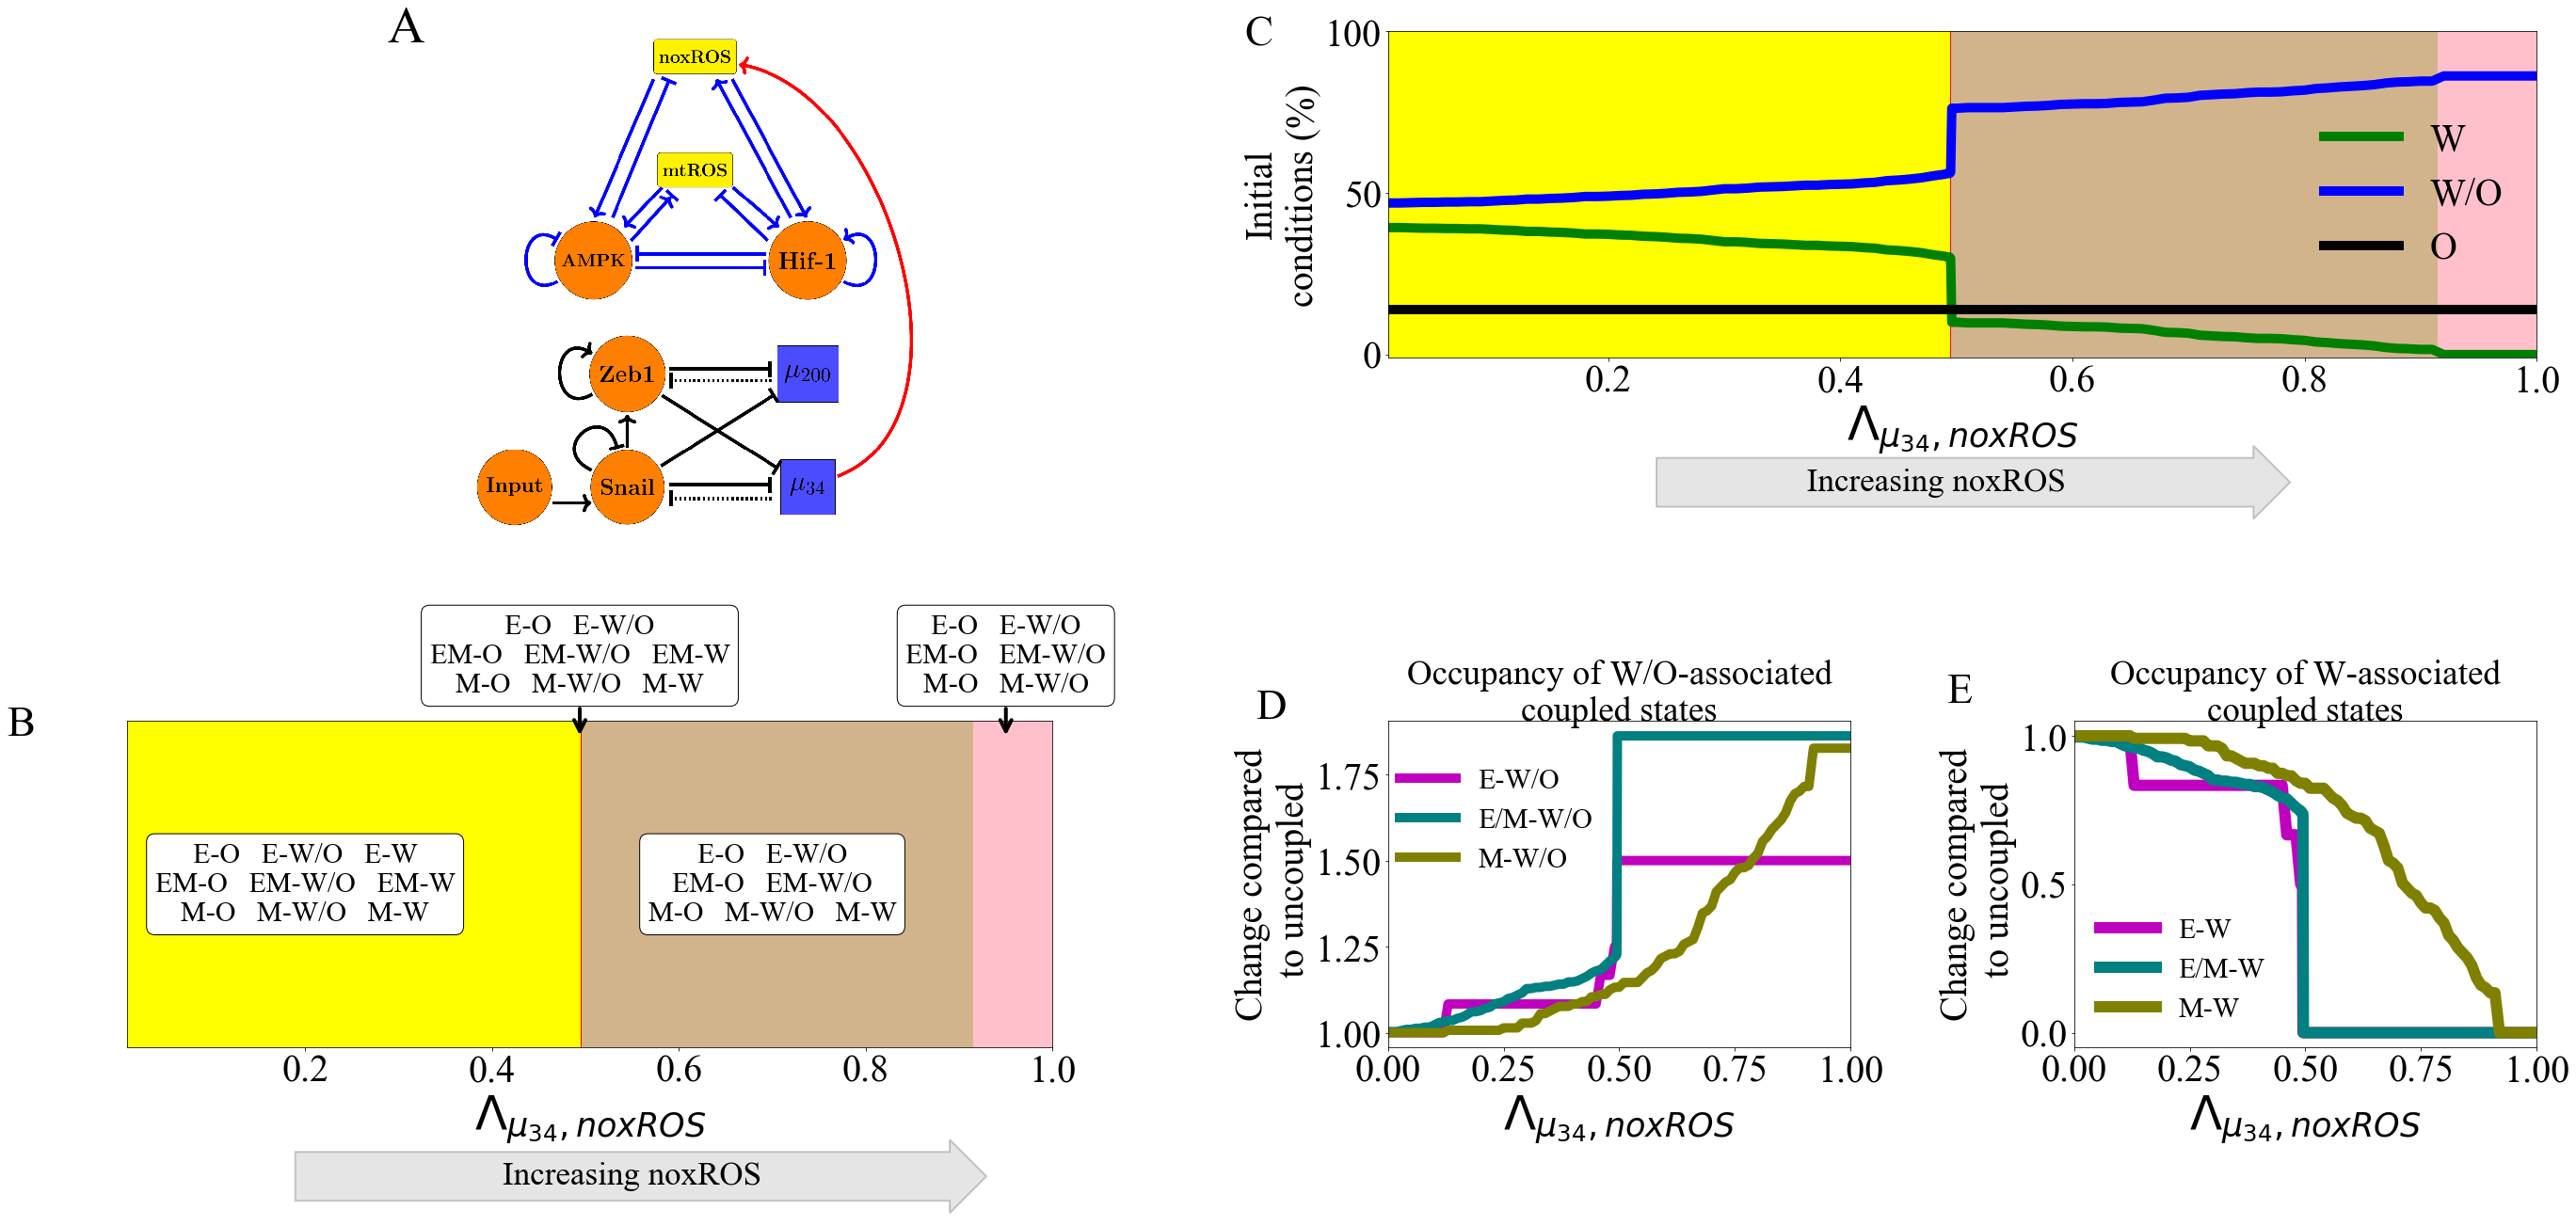

In [13]:
fig = plt.figure(figsize=(9,5))
gs1 = gridspec.GridSpec(4,6, height_ratios=[1.2,0.6,0.6,1.2], width_ratios=[1,0.2,0.1,0.5,0.2,0.5])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=3.,bottom=0)
fs =40
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})
##########
##########

ax2z = plt.subplot(gs1[:2,:2])
img = Image.open('singleLink_u3n.png')
img.resize((1,1))
a = np.asarray(img)
ax2z.imshow(a)
ax2z.axis("off")
ax2z.text(-0.1, 1.05, 'A',transform=ax2z.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)

######################
######################
######################
ax2a = plt.subplot(gs1[3,0])
ax2a.text(-0.1, 1.05, 'B',transform=ax2a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
labs = colorMap("data_2a_legend.txt")
df = pd.read_csv("data_2a.txt")
for i in range(len(df)):
    df['X1'].values[i]=1.-df['X1'].values[i]
    df['X2'].values[i]=1.-df['X2'].values[i]
for i in range(len(df)):
        ax2a.fill_between([df['X1'].values[i],df['X2'].values[i]],df['Y1'].values[i],df['Y2'].values[i],facecolor=getColor(labs[df['color'].values[i]]),linewidth=0.0)

ax2a.set_xlabel("$\Lambda_{\mu_{34},noxROS}$",fontsize=fs+10)
ax2a.set_yticks([])
ax2a.set_xlim(0.01,1)
ax2a.set_ylim(-0.5,0.5)

ax2a.annotate('E-O   E-W/O   E-W\nEM-O   EM-W/O   EM-W\nM-O   M-W/O   M-W', fontsize=30,xy=(0.2, 0.), xycoords="data",xytext=(0.2,0.), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
ax2a.annotate('E-O   E-W/O\nEM-O   EM-W/O   EM-W\nM-O   M-W/O   M-W', fontsize=30,xy=(0.494, 0.45), xycoords="data",xytext=(0.494,0.7), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2a.annotate('E-O   E-W/O\nEM-O   EM-W/O\nM-O   M-W/O   M-W', fontsize=30,xy=(0.7, 0.), xycoords="data",xytext=(0.7,0.), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
ax2a.annotate('E-O   E-W/O\nEM-O   EM-W/O\nM-O   M-W/O', fontsize=30,xy=(0.95, 0.45), xycoords="data",xytext=(0.95,.7), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2a.text(0,0.752,' ')

t=ax2a.text(0.2, -0.85, "                        Increasing noxROS                        ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
ax2a.text(0,-1," ")
##########
##########
ax2b = plt.subplot(gs1[0,3:])
ax2b.text(-0.1, 1.05, 'C',transform=ax2b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
color={'W':'g','O':'k','WO':'b'}
mark = {'E':'dotted','M':'--','EM':'-.','WO':'-','W':'-'}
for i in range(len(df)):
        ax2b.fill_between([df['X1'].values[i],df['X2'].values[i]],-10,110,facecolor=getColor(labs[df['color'].values[i]]),linewidth=0.0)
df2b = pd.read_csv("data_2a_ics.txt")
for i in range(len(df2b)):
    df2b['x'].values[i] = 1.-df2b['x'].values[i]
for key in ['W','WO','O']:#['E/O','E/WO','E/W','M/O','M/WO','M/W','EM/O','EM/WO','EM/W']:
        x=df2b['x'].values
        y=df2b[key].values
        inds = np.argsort(x)
        x=x[inds]
        y=y[inds]
        ax2b.plot(x,y,'-',color=color[key],lw=10,label=labelD[key])
ax2b.set_xlabel("$\Lambda_{\mu_{34},noxROS}$",fontsize=fs+10)
ax2b.set_ylabel("Initial\nconditions (%)")
ax2b.legend(frameon=False)#bbox_to_anchor=(1.1, 0.5), loc='center left',frameon=False,fontsize=30)
ax2b.set_xlim(0.01,1)
ax2b.set_ylim(-1,100)
t=ax2b.text(0.25, -35, "                 Increasing noxROS                        ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)

#####################
a={'W':0.5,'E/W':1.,'EM/W':1.,'M/W':1.,
   'WO':0.5,'E/WO':1.,'EM/WO':1.,'M/WO':1.}

color={'EM':'teal','M':'olive','E':'m'}
ax2d = plt.subplot(gs1[3,3])
ax2d.text(-0.22, 1.1, 'D',transform=ax2d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
for key in ['E/WO','EM/WO','M/WO']:#,'WO']:#['E/O','E/WO','E/W','M/O','M/WO','M/W','EM/O','EM/WO','EM/W']:
        x=df2b['x'].values
        y=df2b[key].values
        div = df2b['WO'].values
        inds = np.argsort(x)
        x=x[inds]
        y=y[inds]/getCompV(key)
        ax2d.plot(x,y,color=color[key.split("/")[0]],linestyle='-',lw=10,label=labelD[key],markersize=20,alpha=a[key])
ax2d.set_xlabel("$\Lambda_{\mu_{34},noxROS}$",fontsize=fs+10)
ax2d.set_ylabel("Change compared\n to uncoupled")
ax2d.set_title("Occupancy of W/O-associated\ncoupled states",fontsize=fs-3,pad=0.6)
ax2d.legend(fontsize=fs-10,frameon=False,loc=(0.,0.5))#bbox_to_anchor=(1.1, 0.5), loc='center left',frameon=False,fontsize=30)
ax2d.set_xlim(0,1)
#ax2d.set_ylim(-0.05,1.05)

ax2e = plt.subplot(gs1[3,5])
ax2e.text(-0.22, 1.15, 'E',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
for key in ['E/W','EM/W','M/W']:#,'W']:#['E/O','E/WO','E/W','M/O','M/WO','M/W','EM/O','EM/WO','EM/W']:
        x=df2b['x'].values
        y=df2b[key].values
        div = df2b['W'].values
        inds = np.argsort(x)
        x=x[inds]
        y=y[inds]/getCompV(key)
        ax2e.plot(x,y,color=color[key.split("/")[0]],linestyle='-',label=labelD[key],lw=12,markersize=20,alpha=a[key])
ax2e.set_xlabel("$\Lambda_{\mu_{34},noxROS}$",fontsize=fs+10)
ax2e.set_ylabel("Change compared\n to uncoupled")
ax2e.set_title("Occupancy of W-associated\ncoupled states",fontsize=fs-3,pad=0.6)
ax2e.legend(fontsize=fs-10,frameon=False)#bbox_to_anchor=(1.1, 0.5), loc='center left',frameon=False,fontsize=30)
ax2e.set_xlim(0,1)
#ax2e.set_ylim(-0.05,1.05)


fig.savefig("Figure2.png",bbox_inches='tight')#,dpi=300)

# Figure 3

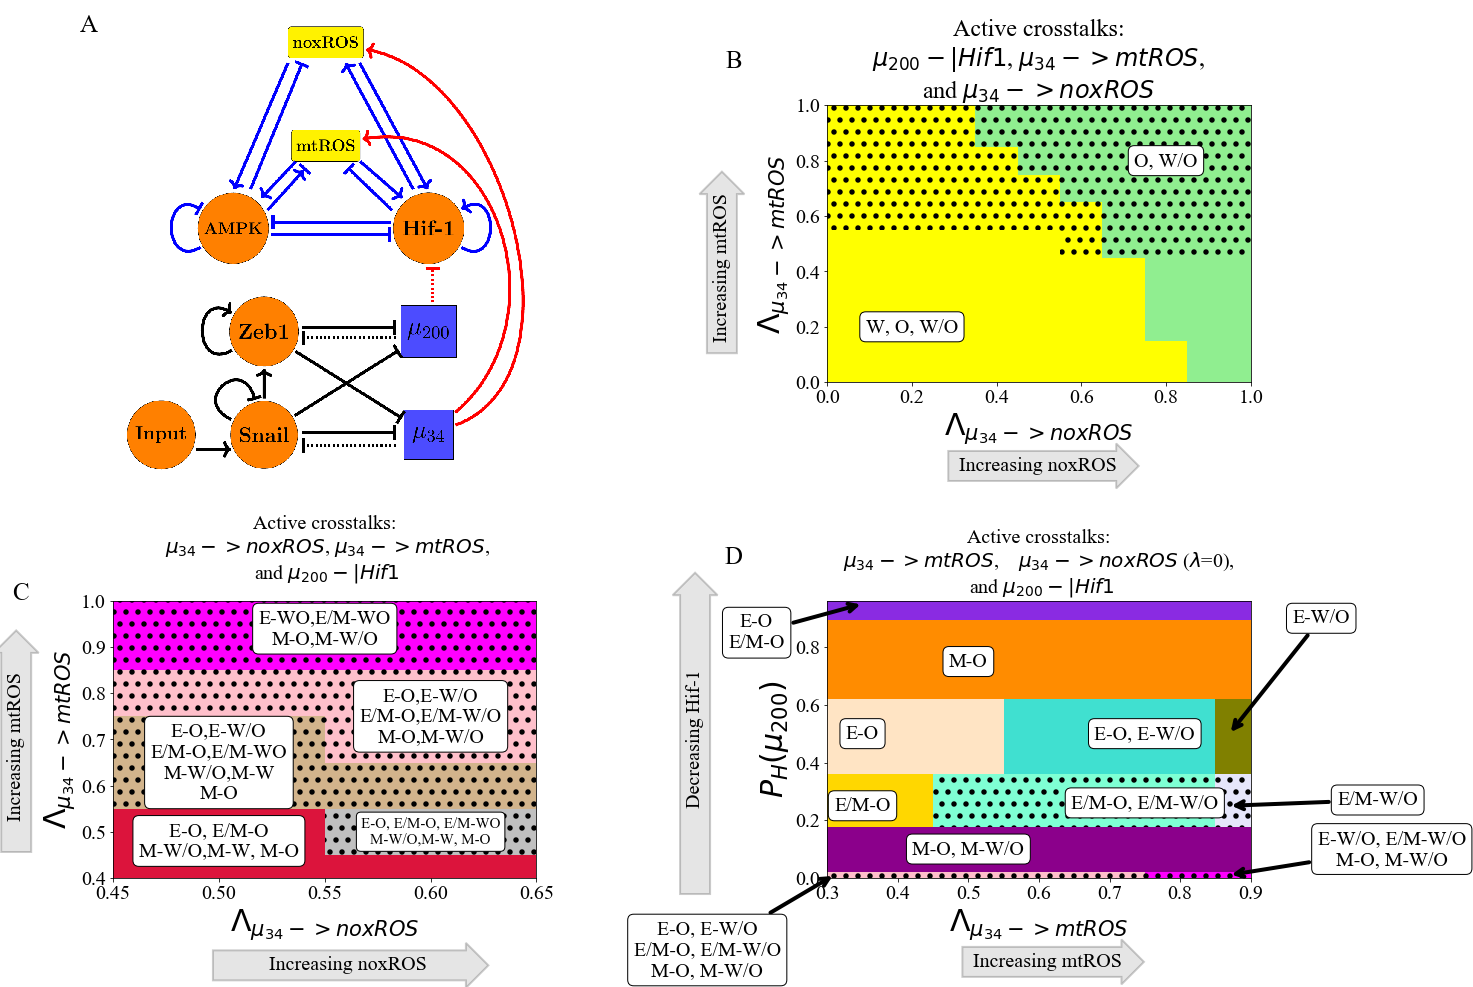

In [40]:
fig = plt.figure(figsize=(4,6))
gs1 = gridspec.GridSpec(5,3, height_ratios=[0.3,1,0.3,0.4,1], width_ratios=[1,0.6,1])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=2.,bottom=0)
fs =20
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})

######################
######################
######################
######################
ax2c = plt.subplot(gs1[0:3,0])
ax2c.text(-0.05, 1., 'A',transform=ax2c.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
img = Image.open('fullMR.png')
img.resize((8000,8000))
a = np.asarray(img)
ax2c.imshow(a)
ax2c.axis("off")
######################
######################
ax2d = plt.subplot(gs1[1,2])
ax2d.text(-0.2, 1.2, 'B',transform=ax2d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotPhases(ax2d,'','data_3_MR1_red',"$\Lambda_{\mu_{34}->noxROS}$","$\Lambda_{\mu_{34}->mtROS}$",xlim=[0.,1],ylim=[0,1],legend=False,reduced=True)
#ax2d.set_title("l=[1.,0.9,0.8]\n$y_m$=[0,0.002,0.01]\n$y_\mu$=[0,0.001,0.009]")
ax2d.set_title("Active crosstalks:\n$\mu_{200}-|Hif1$, $\mu_{34}->mtROS$,\nand $\mu_{34}->noxROS$")
ax2d.annotate('W, O, W/O', fontsize=20,xy=(0.2, .2), xycoords='data',va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2d.annotate('O, W/O', fontsize=20,xy=(0.8,0.8), xycoords='data',va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
######################
t=ax2d.text(-0.27, 0.7, " Increasing mtROS ",
            size=fs,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=90)
t=ax2d.text(0.3, -.27, " Increasing noxROS ",
            size=fs,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
ax2d.text(-0.2,-0.3,' ')


##########
ax3a = plt.subplot(gs1[4,0])
plotPhases(ax3a,'C','data_4a',"$\Lambda_{\mu_{34}->noxROS}$","$\Lambda_{\mu_{34}->mtROS}$",legend=False,xlim=[0.45,0.65],ylim=[0.4,1])

ax3a.annotate('E-WO,E/M-WO\nM-O,M-W/O', fontsize=20,xy=(0.55, 0.94), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
ax3a.annotate('E-O,E-W/O\nE/M-O,E/M-W/O\nM-O,M-W/O', fontsize=20,xy=(0.6, 0.75), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
ax3a.annotate('E-O,E-W/O\nE/M-O,E/M-WO\nM-W/O,M-W\nM-O', fontsize=20,xy=(0.5, 0.65), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
ax3a.annotate('E-O, E/M-O, E/M-WO\nM-W/O,M-W, M-O', fontsize=15,xy=(0.6, 0.5), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
ax3a.annotate('E-O, E/M-O\nM-W/O,M-W, M-O', fontsize=20,xy=(0.5, 0.48), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
t=ax3a.text(0.4, 0.9, "     Increasing mtROS     ",
            size=fs,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=90)
t=ax3a.text(0.5, 0.23, "          Increasing noxROS         ",
            size=fs,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
ax3a.text(.5,1.3,"Active crosstalks:\n $\mu_{34}->noxROS$, $\mu_{34}->mtROS$,\n and $\mu_{200}-|Hif1$",
          transform=ax3a.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs)

#############################
ax2d = plt.subplot(gs1[4,2])
ax2d.text(-0.2, 1.2, 'D',transform=ax2d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotPhases(ax2d,'','data_3_MR3_single_NOX0',"$\Lambda_{\mu_{34}->mtROS}$","$P_H(\mu_{200})$",xlim=[0.3,0.9],ylim=[0.,0.96],legend=False)
t=ax2d.text(0.1, 1., "                Decreasing Hif-1                ",
            size=fs,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=90)
t=ax2d.text(0.5, -.26, " Increasing mtROS ",
            size=fs,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
ax2d.text(-0.2,-0.3,' ')
ax2d.text(.5,1.25,"Active crosstalks:\n$\mu_{34}->mtROS$,    $\mu_{34}->noxROS$ ($\lambda$=0), \n and $\mu_{200}-|Hif1$",
          transform=ax2d.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs)

ax2d.annotate('E-O\nE/M-O', fontsize=fs,xy=(0.35, 0.95), xycoords="data",xytext=(0.2,0.85), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2d.annotate('M-O', fontsize=fs,xy=(0.5, 0.75), xycoords="data",xytext=(0.5,0.75), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax2d.annotate('E-O, E-W/O', fontsize=fs,xy=(0.75, 0.5), xycoords="data",xytext=(0.75,0.5), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax2d.annotate('E-O', fontsize=fs,xy=(0.35, 0.5), xycoords="data",xytext=(0.35,0.5), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax2d.annotate('E/M-O', fontsize=fs,xy=(0.35, 0.25), xycoords="data",xytext=(0.35,0.25), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax2d.annotate('E/M-O, E/M-W/O', fontsize=fs,xy=(0.75, 0.26), xycoords="data",xytext=(0.75,0.26), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax2d.annotate('M-O, M-W/O', fontsize=fs,xy=(0.5, 0.1), xycoords="data",xytext=(0.5,0.1), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))

ax2d.annotate('E-W/O', fontsize=fs,xy=(0.87, 0.5), xycoords="data",xytext=(1.0,0.9), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2d.annotate('E/M-W/O', fontsize=fs,xy=(0.87, 0.25), xycoords="data",xytext=(1.08,0.27), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2d.annotate('E-W/O, E/M-W/O\nM-O, M-W/O', fontsize=fs,xy=(0.87, 0.01), xycoords="data",xytext=(1.1,0.10), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2d.annotate('E-O, E-W/O\nE/M-O, E/M-W/O\nM-O, M-W/O', fontsize=fs,xy=(0.31, 0.01), xycoords="data",xytext=(0.13,-0.25), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))



fig.savefig("Figure3.png",bbox_inches='tight')#,dpi=300)

# Figure 4

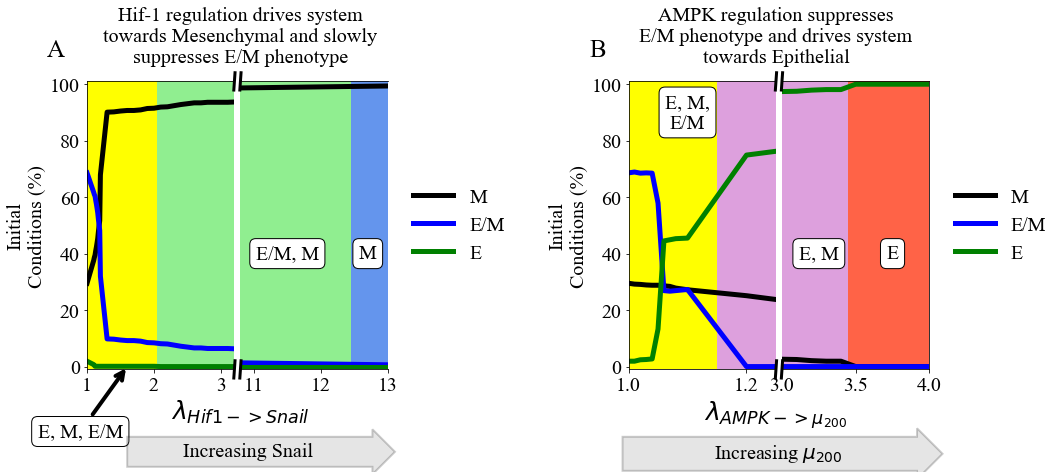

In [34]:
fig = plt.figure()#figsize=(3,5))
gs1 = gridspec.GridSpec(1,7, height_ratios=[1], width_ratios=[0.49,0.02,0.49,0.8,0.49,0.02,0.49])
gs1.update(left=0.05, right=2, wspace=0.,hspace=0.0,top=1.,bottom=0)
fs =20
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})



######################
ax2f1 = plt.subplot(gs1[0,0])
ax2f = plt.subplot(gs1[0,2])
ax2f.text(.0,1.26, 'Hif-1 regulation drives system\ntowards Mesenchymal and slowly\nsuppresses E/M phenotype',
          transform=ax2f.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs)
ax2f.text(0,-.1, '$\lambda_{Hif1->Snail}$',
          transform=ax2f.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs+5)
plotPhaseICS(ax2f1,'A','data_3_HS','EMT',xlabel="$\lambda_{Hif1->Snail}$",xlim=[1,3.2],legend=False)
ax2f1.set_xlabel('')
plotPhaseICS(ax2f,'','data_3_HS','EMT',xlabel="$\lambda_{Hif1->Snail}$",xlim=[10.8,13])
ax2f.yaxis.set_visible(False)
ax2f.set_ylabel("")
ax2f.set_xlabel("")
ax2f.spines['right'].set_visible(False)
ax2f.spines['left'].set_visible(False)

ax2f2 = plt.subplot(gs1[0,1])
d = .03  # how big to make the diagonal lines in axes coordinates
e = 0.1 ## angle for lines in axes
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2f2.transAxes, color='k', clip_on=False,lw=3)
ax2f2.plot((-e, +e), (-d, +d), **kwargs)        # top-left diagonal
ax2f2.plot((- e, + e), (1-d, 1+d), **kwargs)  # top-right diagonal
ax2f2.plot((1-e, 1+e), (-d, +d), **kwargs)        # top-left diagonal
ax2f2.plot((1- e, 1+ e), (1-d, 1+d), **kwargs)  # top-right diagonal
ax2f2.set_xticks([])
ax2f2.set_xticklabels([])
ax2f2.yaxis.set_visible(False)
ax2f2.spines['right'].set_visible(False)
ax2f2.spines['left'].set_visible(False)
ax2f2.spines['top'].set_visible(False)
ax2f2.spines['bottom'].set_visible(False)

t=ax2f.text(9.2, -27, "          Increasing Snail             ",
            size=fs,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
ax2f1.annotate('E, M, E/M', fontsize=20,xy=(1.6, 0), xycoords="data",xytext=(0.9,-23), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2f.annotate('M', fontsize=20,xy=(12.7, 40), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
ax2f.annotate('E/M, M', fontsize=20,xy=(11.5,40), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
######################
######################
ax2e = plt.subplot(gs1[0,4])
ax2e.text(1.,1.26, 'AMPK regulation suppresses\nE/M phenotype and drives system\ntowards Epithelial',
          transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs)
plotPhaseICS(ax2e,'B','data_3_Au','EMT',xlabel="$\lambda_{AMPK->\mu_{200}}$",xlim=[1,1.25])
ax2e.set_xlabel("$\lambda_{Hif1->Snail}$ (log scale)")
ax2e.annotate('E, M,\nE/M', fontsize=20,xy=(1.1, 90), xycoords="data",xytext=(1.1,90), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
t=ax2e.text(1., -27, "                 Increasing $\mu_{200}$                 ",
            size=fs,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
ax2e.set_xlabel("")
ax2e.text(1.,-.1, '$\lambda_{AMPK->\mu_{200}}$',
          transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs+5)
ax2e2 = plt.subplot(gs1[0,6])
plotPhaseICS(ax2e2,'','data_3_Au','EMT',xlabel="$\lambda_{AMPK->\mu_{200}}$",xlim=[3,4])
ax2e2.set_xlabel("")
ax2e2.set_ylabel("")
ax2e2.yaxis.set_visible(False)
ax2e2.spines['left'].set_visible(False)

ax2e2.annotate('E, M', fontsize=20,xy=(3.25, 40), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
ax2e2.annotate('E', fontsize=20,xy=(3.75, 40), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))

ax2fe = plt.subplot(gs1[0,5])
d = .03  # how big to make the diagonal lines in axes coordinates
e = 0.1 ## angle for lines in axes
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2fe.transAxes, color='k', clip_on=False,lw=3)
ax2fe.plot((-e, +e), (-d, +d), **kwargs)        # top-left diagonal
ax2fe.plot((- e, + e), (1-d, 1+d), **kwargs)  # top-right diagonal
ax2fe.plot((1-e, 1+e), (-d, +d), **kwargs)        # top-left diagonal
ax2fe.plot((1- e, 1+ e), (1-d, 1+d), **kwargs)  # top-right diagonal
ax2fe.set_xticks([])
ax2fe.set_xticklabels([])
ax2fe.yaxis.set_visible(False)
ax2fe.spines['right'].set_visible(False)
ax2fe.spines['left'].set_visible(False)
ax2fe.spines['top'].set_visible(False)
ax2fe.spines['bottom'].set_visible(False)

fig.savefig("Figure4.png",bbox_inches='tight')#,dpi=300)

# Figure 5

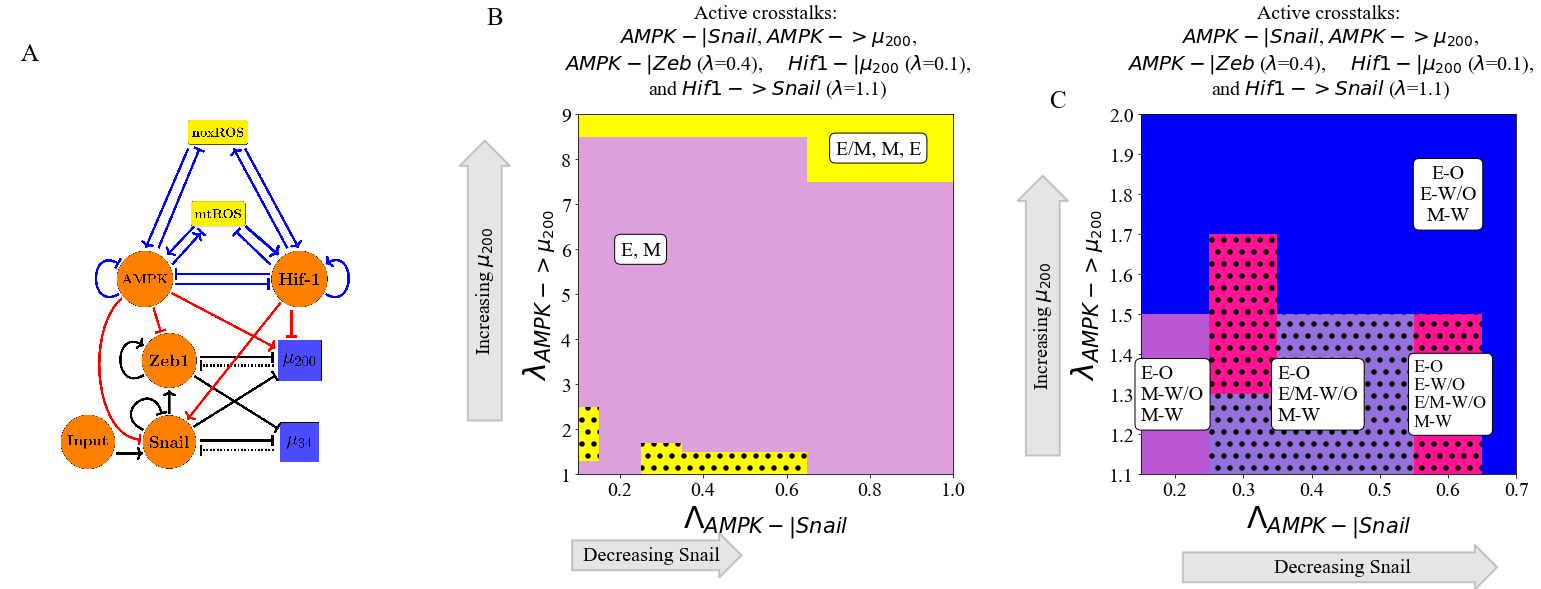

In [45]:
fig = plt.figure(figsize=(3,5))
gs1 = gridspec.GridSpec(1,5, height_ratios=[1], width_ratios=[1,0.5,1,0.5,1])
gs1.update(left=0.05, right=7, wspace=0.0,hspace=0.05,top=1.,bottom=0)
fs =20
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})


######################
######################

ax2g = plt.subplot(gs1[0,0])
ax2g.text(-0.05, 1.2, 'A',transform=ax2g.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
img = Image.open('fullEMT.png')
img.resize((8000,8000))
a = np.asarray(img)
ax2g.imshow(a)
ax2g.axis("off")
######################
######################
ax2h = plt.subplot(gs1[0,2])
ax2h.text(-0.2, 1.3, 'B',transform=ax2h.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotPhases(ax2h,'','data_3_EMT_red',"$\Lambda_{AMPK-|Snail}$","$\lambda_{AMPK->\mu_{200}}$",xlim=[0.1,1],ylim=[1,9],legend=False,reduced=True)
ax2h.annotate('E, M', fontsize=20,xy=(0.25,6), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
ax2h.annotate('E/M, M, E', fontsize=20,xy=(0.82, 8.25), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
#ax2f.text(.5,1.2,"$\lambda_{Hif1-|\mu_{200}}=0.1$\n$\lambda_{AMPK-|ZEB}=0.4$, $\lambda_{Hif1->Snail}=1.1$",

t=ax2h.text(-.15, 8., "            Increasing $\mu_{200}$              ",
            size=fs,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=90)
t=ax2h.text(0.1, -0.6, " Decreasing Snail ",
            size=fs,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
ax2h.text(1.4,-1.3,' ')
ax2h.text(.5,1.3,"Active crosstalks:\n $AMPK -| Snail$, $AMPK -> \mu_{200}$,\n $AMPK-| Zeb$ ($\lambda$=0.4),     $Hif1-|\mu_{200}$ ($\lambda$=0.1),\n and $Hif1->Snail$ ($\lambda$=1.1)",
          transform=ax2h.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs)



#########################
ax3b = plt.subplot(gs1[0,4])
plotPhases(ax3b,'C','data_4b',"$\Lambda_{AMPK-|Snail}$","$\lambda_{AMPK->\mu_{200}}$",legend=False,xlim=[0.15,0.7],ylim=[1.1,2])
ax3b.annotate('E-O\nE/M-W/O\nM-W', fontsize=20,xy=(0.35, 1.3), xycoords="data",va="center", ha='left',bbox=dict(boxstyle="round", fc="w"))
ax3b.annotate('E-O\nM-W/O\nM-W', fontsize=20,xy=(0.15, 1.3), xycoords="data",va="center", ha='left',bbox=dict(boxstyle="round", fc="w"))
ax3b.annotate('E-O\nE-W/O\nE/M-W/O\nM-W', fontsize=18,xy=(0.55, 1.3), xycoords="data",va="center", ha='left',bbox=dict(boxstyle="round", fc="w"))
ax3b.annotate('E-O\nE-W/O\nM-W', fontsize=20,xy=(0.6, 1.8), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
#ax3b.annotate('E-O, M-W/O, M-W', fontsize=20,xy=(0.77, 1.2), xycoords="data",va="center", ha='left',bbox=dict(boxstyle="round", fc="w"))
t=ax3b.text(-0.01, 1.8, "            Increasing $\mu_{200}$              ",
            size=fs,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=90)
t=ax3b.text(0.22, 0.89, "                 Decreasing Snail              ",
            size=fs,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
ax3b.text(.5,1.3,"Active crosstalks:\n $AMPK -| Snail$, $AMPK -> \mu_{200}$,\n $AMPK-| Zeb$ ($\lambda$=0.4),     $Hif1-|\mu_{200}$ ($\lambda$=0.1),\n and $Hif1->Snail$ ($\lambda$=1.1)",
          transform=ax3b.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs)


fig.savefig("Figure5.png",bbox_inches='tight')#,dpi=300)

#### Caption
Crosstalks in one direction not enough to suppress all coupled states except E/M-W/O. (A) The number of initial conditions leading to the W, O, or W/O metabolic phenotypes. The colors (blue, purple, and grey) represent the possible phenotypes (O, [W,O], and [W,O,W/O]) as the Hif1 mRNA is silenced. (B) Similar to (A) but for an increasing upregulation of mtROS by $\mu_{34}$. (C) The networks showing the regulating of Hif1 by $\mu_{200}$ and ROS by $\mu_{34}$. When all three crosstalks are active there is a parameter space in which W/O phenotype persists and the dotted regions show where the E/M-W/O coupled state exists. (D) The number of initial conditions leading to an E/M, M, or E phenotype as AMPK upregulates $\mu_{200}$. The hybrid E/M phenotype is suppressed quickly as the system is driven towards epithelial. (E) Similar to (D) but for Hif-1 driving the system towards mesenchymal. The E/M state persists longer for Hif-1 regulation than AMPK. (F) The crosstalks involving AMPK (top) and Hif1 (bottom). When all five crosstalks are actively regulating the EMT circuit, there are only a few regions where the E/M phenotype exists alongside the E and M phenotype. Additionally, there are some regions (the dotted black areas) where the E/M-W/O coupled state also exists.

# Figure 6

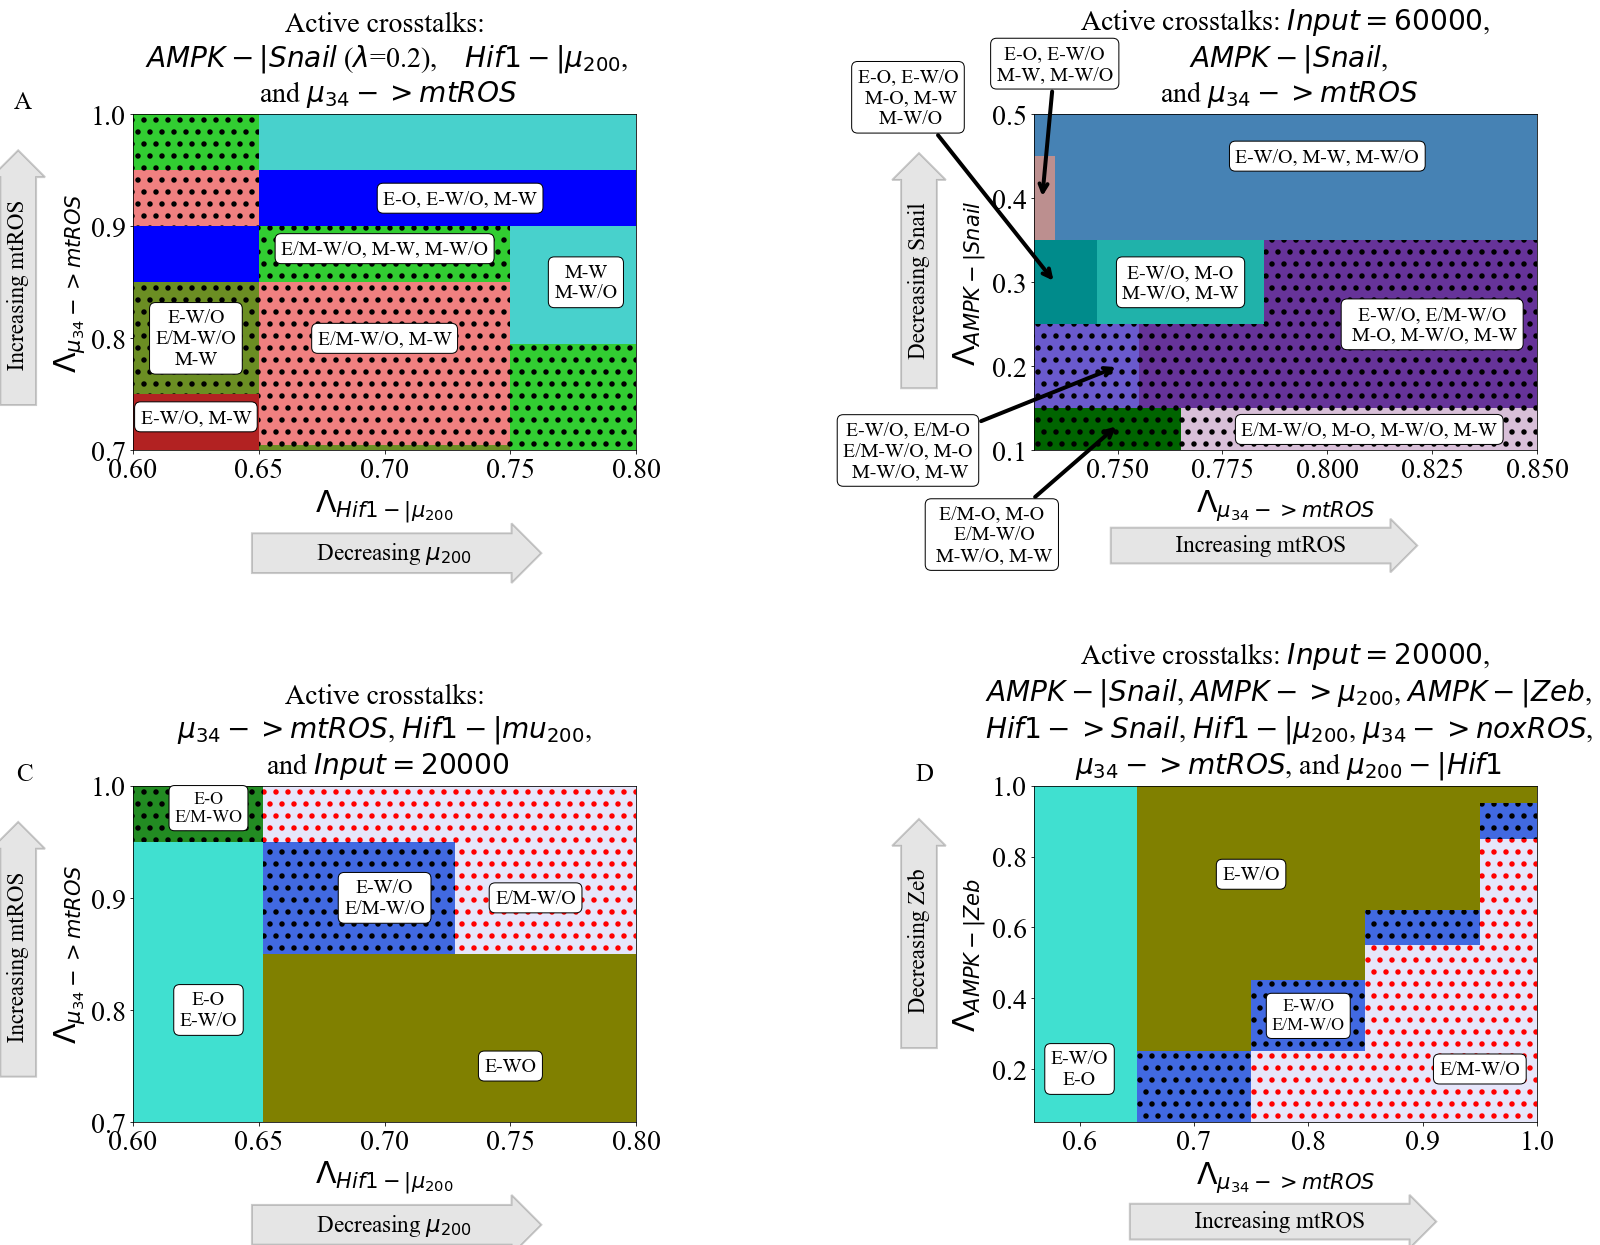

In [50]:
fig = plt.figure(figsize=(10,7))
gs1 = gridspec.GridSpec(3,3, height_ratios=[1.,.9,1], width_ratios=[1,0.7,1])
gs1.update(left=0.05, right=2., wspace=0.05,hspace=0.05,top=2.,bottom=0)
fs =28
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})


##########
ax3b = plt.subplot(gs1[0,0])
## AS_Hu_u3m
plotPhases(ax3b,'A','data_AS_Hu_u3m',"$\Lambda_{Hif1-|\mu_{200}}$","$\Lambda_{\mu_{34}->mtROS}$",legend=False,xlim=[0.6,.8],ylim=[0.7,1])
t=ax3b.text(0.55, 0.95, "     Increasing mtROS     ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=90)
t=ax3b.text(0.65, .62, "          Decreasing $\mu_{200}$         ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
ax3b.text(.5,1.3,"Active crosstalks:\n $AMPK -| Snail$ ($\lambda$=0.2),    $Hif1-|\mu_{200}$, \n and $\mu_{34}->mtROS$",
          transform=ax3b.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs)


ax3b.annotate('E-W/O, M-W', fontsize=20,xy=(0.625, 0.73), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
ax3b.annotate('E/M-W/O, M-W', fontsize=20,xy=(0.7, 0.8), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
ax3b.annotate('E-O, E-W/O, M-W', fontsize=20,xy=(0.73, 0.925), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
ax3b.annotate('E-W/O\nE/M-W/O\nM-W', fontsize=20,xy=(0.625, 0.8), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
ax3b.annotate('E/M-W/O, M-W, M-W/O', fontsize=20,xy=(0.7, 0.88), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
ax3b.annotate('M-W\nM-W/O', fontsize=20,xy=(0.78, 0.85), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))

##########
ax3a = plt.subplot(gs1[0,2])
## AS_u3m_input
plotPhases(ax3a,'B','data_AS_u3m_input',"$\Lambda_{\mu_{34}->mtROS}$","$\Lambda_{AMPK-|Snail}$",legend=False,xlim=[0.73,0.85],ylim=[0.1,0.5])
t=ax3a.text(0.7, 0.43, "    Decreasing Snail     ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=90)
t=ax3a.text(0.75, 0., "          Increasing mtROS         ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)

ax3a.text(.5,1.32,"Active crosstalks: $Input=60000$,\n $AMPK -| Snail$,\n and $\mu_{34}->mtROS$",
          transform=ax3a.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs)
ax3a.annotate('E-W/O, M-W, M-W/O', fontsize=20,xy=(0.8, 0.45), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
ax3a.annotate('E-W/O, E/M-W/O\n M-O, M-W/O, M-W', fontsize=20,xy=(0.825, 0.25), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
ax3a.annotate('E/M-W/O, M-O, M-W/O, M-W', fontsize=20,xy=(0.81, 0.125), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
ax3a.annotate('E-W/O, M-O\nM-W/O, M-W', fontsize=20,xy=(0.765, 0.3), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))

ax3a.annotate('E/M-O, M-O\n E/M-W/O\n M-W/O, M-W', fontsize=20,xy=(0.75, .13), xycoords='data',xytext=(0.72,0), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax3a.annotate('E-O, E-W/O\n M-O, M-W\n M-W/O', fontsize=20,xy=(0.735, .3), xycoords='data',xytext=(0.7,.52), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax3a.annotate('E-O, E-W/O\nM-W, M-W/O', fontsize=20,xy=(0.732, .4), xycoords='data',xytext=(0.735,.56), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax3a.annotate('E-W/O, E/M-O\nE/M-W/O, M-O\n M-W/O, M-W', fontsize=20,xy=(0.75, .2), xycoords='data',xytext=(0.7,.1), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))


##########
ax3c = plt.subplot(gs1[2,0])
plotPhases(ax3c,'C','data_4c',"$\Lambda_{Hif1-|\mu_{200}}$","$\Lambda_{\mu_{34}->mtROS}$",legend=False,xlim=[0.6,0.8],ylim=[0.7,1])
ax3c.annotate('E-O\nE/M-WO', fontsize=18,xy=(0.63, 0.98), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax3c.annotate('E-W/O\nE/M-W/O', fontsize=20,xy=(0.7, 0.9), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax3c.annotate('E-WO', fontsize=20,xy=(0.75, 0.75), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax3c.annotate('E/M-W/O', fontsize=20,xy=(0.76, 0.9), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
ax3c.annotate('E-O\nE-W/O', fontsize=20,xy=(0.63, 0.8), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))
t=ax3c.text(0.55, 0.95, "     Increasing mtROS     ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=90)
t=ax3c.text(0.65, .62, "          Decreasing $\mu_{200}$         ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
ax3c.text(.5,1.3,"Active crosstalks:\n$\mu_{34}->mtROS$, $Hif1-|mu_{200}$,\n and $Input=20000$",
          transform=ax3c.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs)

#dfh = pd.read_csv("data_4c_hullO.txt")
#poly = geometry.Polygon(dfh.values)
#ax3c.add_patch(PolygonPatch(poly,alpha=0.9,hatch='.',edgecolor='r',facecolor='none'))

#dfh = pd.read_csv("data_4c_hull.txt")
#poly = geometry.Polygon(dfh.values)
#ax3c.add_patch(PolygonPatch(poly,alpha=0.9,hatch='.',edgecolor='k',facecolor='none'))


##########
ax3d = plt.subplot(gs1[2,2])
plotPhases(ax3d,'D','data_4d',"$\Lambda_{\mu_{34}->mtROS}$","$\Lambda_{AMPK-|Zeb}$",xlim=[.56,1],ylim=[0.05,1],legend=False)
ax3d.annotate('E/M-W/O', fontsize=20,xy=(0.95, 0.2), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax3d.annotate('E-W/O\nE-O', fontsize=20,xy=(0.6, 0.2), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax3d.annotate('E-W/O', fontsize=20,xy=(0.75, 0.75), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax3d.annotate('E-W/O\nE/M-W/O', fontsize=18,xy=(0.8, 0.35), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
t=ax3d.text(0.45, 0.85, "     Decreasing Zeb     ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=90)
t=ax3d.text(0.65, -0.2, "          Increasing mtROS         ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
ax3d.text(.5,1.43,"Active crosstalks: $Input=20000$,\n $AMPK -| Snail$, $AMPK -> \mu_{200}$, $AMPK-| Zeb$,\n $Hif1->Snail$, $Hif1-|\mu_{200}$, $\mu_{34}->noxROS$,\n $\mu_{34}->mtROS$, and $\mu_{200}-|Hif1$",
          transform=ax3d.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs)


fig.savefig("Figure6.png",bbox_inches='tight')#,dpi=300)

##### Caption

The hybrid E/M and W/O states are coupled. (A) The coupled states when only ROS of the metabolic circuit (mt and nox) are regulated by u34. The E/M-W/O state is present in most regions. (B) The coupled states when only TFs and miRNAs of the EMT circuit are regulated by TFs of the metabolic circuit (AMPK-|Snail, AMPK-|Zeb=?, AMPK->u200, Hif1-|u200=?, Hif1->Snail=?).  The E/M-W/O state is present in some regions. (C) When crosstalks in both directions are active there are parameter spaces in which the only possible coupled state is the E/M-W/O state. (D) When all crosstalks are active there are regions where only the E/M-W/O state exists.

# Figure 7

##### Caption

Fig. 4 Parameter ranges which exclude the possibility of the hybrid state can be modulated by crosstalk to generate the hybrid state. (A) Our model using parameters that remove the hybrid W/O metabolic state from the steady state possibilities when the crosstalk is inactive ($\lambda_{\mu_{34}->mtROS}=1.$). Initially, only the OXPHOS and Warburg metabolic states can be accessed with an increase in the percent of OXPHOS steady states and decrease in Warburg phenotypes. Once $\lambda_{\mu{34}}=0.35$, there is a sharp change with the hybrid W/O phenotype becoming the most often occupied phenotype. (B) Our model using parameters that remove the hybrid E/M phenotype from the accessible states when the crosstalks are inactive. By adjusting the level of input to Snail (y-axis) and the inhibition of $\mu_{200}$ by Hif-1 (x-axis), the system can access the E/M hybrid state (orange, light blue, and purple regions). (C) Focusing on the region in (B) where the input to snail is 10K, the percent of initial conditions leading to E, M, or the E/M phenotype can be seen. As the inhibition increases ($\lambda_{Hif1-|\mu_{200}}$ goes towards zero), the system goes from all initial conditions leading to the Epithelial state to a region with both E and E/M phenotypes accessible. (D) Combining the models from (A) and (B), we generate a model which only has 4 possible coupled states if the crosstalks are inactive (E-O, E-W, M-O, and M-W). By setting the input to snail to be 10K, upregulating mtROS, and downregulating mir200 the E/M-W/O state becomes accessible and, at around $\lambda_{\mu_{34}->mtROS}=0.1$ and $\lambda_{Hif1-|\mu_{200}}=0.1$, the E/M-W/O state is the only one accessible, similar to the model with parameters always allowing access to the E/M-W/O state.


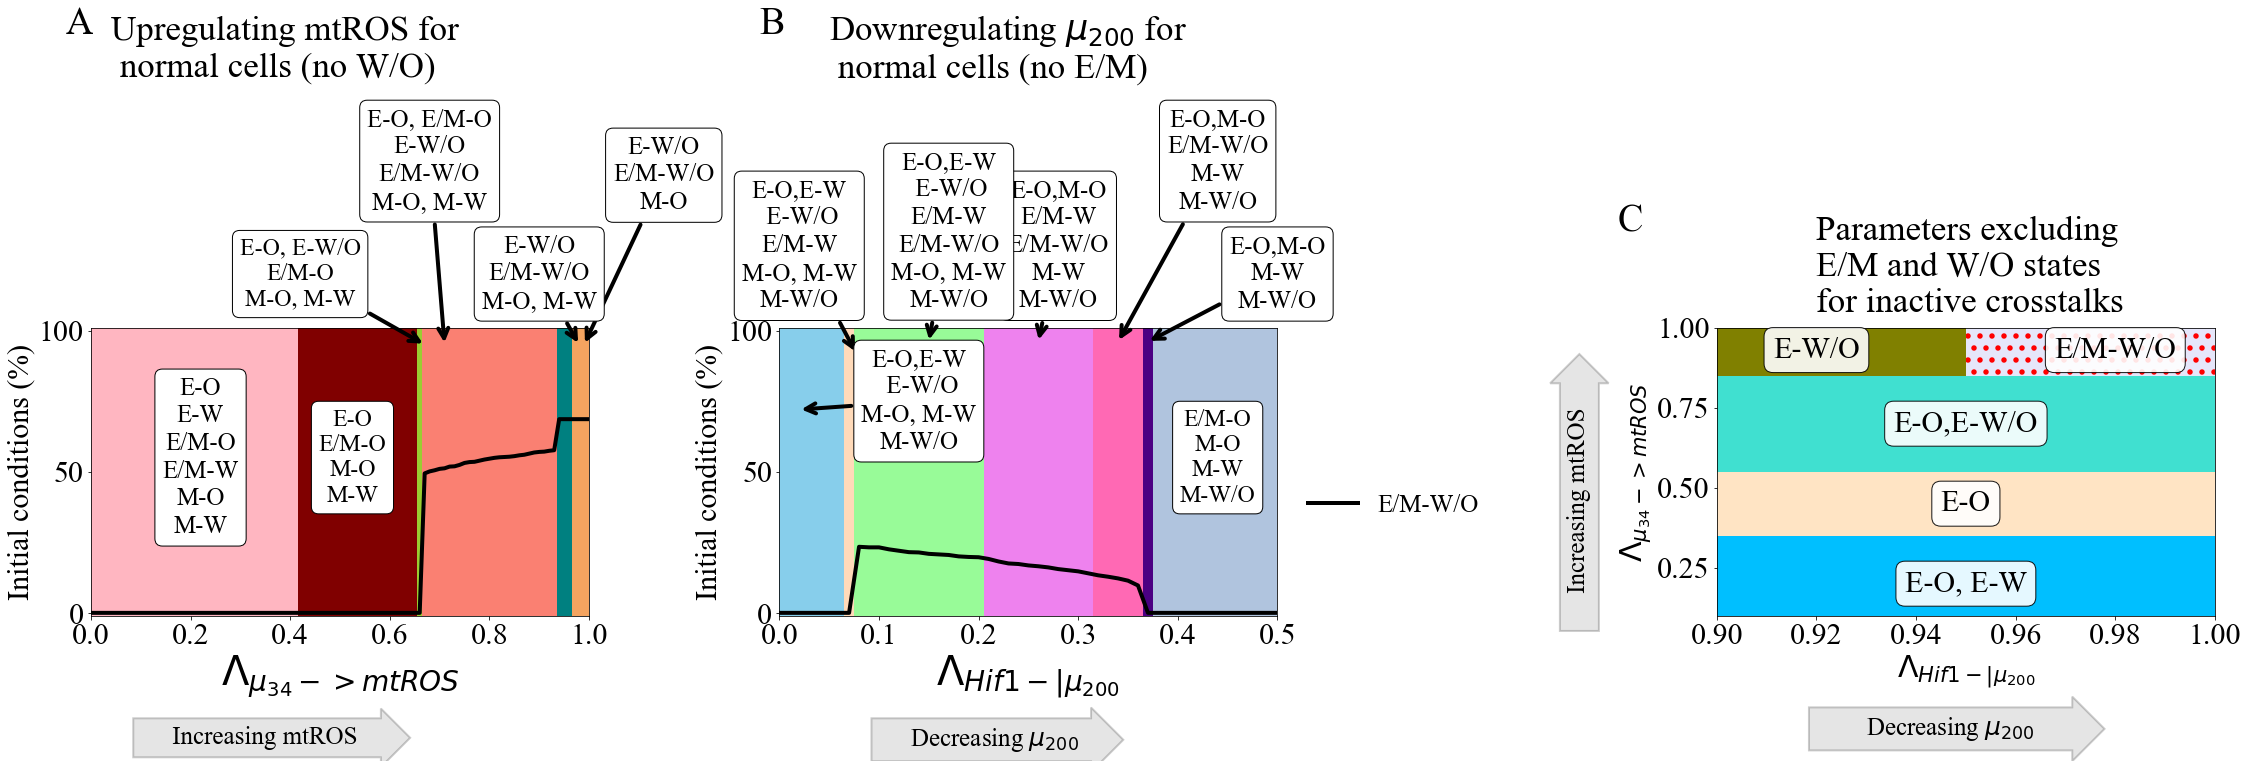

In [52]:
fig = plt.figure(figsize=(10,4))
gs1 = gridspec.GridSpec(1,5, height_ratios=[1.2], width_ratios=[1,0.3,1,0.8,1])
gs1.update(left=0.05, right=3., wspace=0.05,hspace=0.05,top=1.,bottom=0)
fs =30
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})

##########
##########
ax4a = plt.subplot(gs1[0,0])
plotPhases(ax4a,'','data_5a_full',xlabel="$\Lambda_{\mu_{34}->mtROS}$",xlim=[0,1],ylim=[-1,101],fs=fs,legend=False,noEMWO=True)

df = pd.read_csv("data_5a_ics.txt")
for i in range(len(df)):
    df['x'].values[i] = 1.-df['x'].values[i]
inds = np.argsort(df['x'].values)
ax4a.plot(df['x'].values[inds],df['EM/WO'].values[inds],'k',lw=4,label='E/M-W/O')
#ax4a.plot(df['x'].values[inds],df['WO'].values[inds],'r',lw=4)

ax4a.annotate('E-O\nE-W\nE/M-O\nE/M-W\nM-O\nM-W', fontsize=fs-5,xy=(0.22, 55), xycoords="data",xytext=(0.22,55), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax4a.annotate('E-O\nE/M-O\nM-O\nM-W', fontsize=fs-6,xy=(0.525, 55), xycoords="data",xytext=(0.525,55), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax4a.annotate('E-O, E-W/O\nE/M-O\nM-O, M-W', fontsize=fs-6,xy=(0.67, 95), xycoords="data",xytext=(0.42,120), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax4a.annotate('E-O, E/M-O\nE-W/O\nE/M-W/O\nM-O, M-W', fontsize=fs-5,xy=(0.71, 95), xycoords="data",xytext=(0.68,160), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax4a.annotate('E-W/O\nE/M-W/O\nM-O', fontsize=fs-5,xy=(0.99, 95), xycoords="data",xytext=(1.15,155), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))#,color=getColor(['E/WO','EM/WO','M/O'])))
ax4a.annotate('E-W/O\nE/M-W/O\nM-O, M-W', fontsize=fs-5,xy=(0.98, 95), xycoords="data",xytext=(0.9,120), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))

t=ax4a.text(0.04, 190.,"Upregulating mtROS for\n normal cells (no W/O)",fontsize=fs+5)
t=ax4a.text(-0.05, 205.,"A",fontsize=fs+8)
t=ax4a.text(0.1, -40., "     Increasing mtROS     ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
ax4a.set_ylabel("Initial conditions (%)")

###########3
###########
ax4b = plt.subplot(gs1[0,2])
#plotPhaseICS(ax4a,'A','data_5a','MR',xlabel="$\lambda_{\mu_{34}->mtROS}$",xlim=[0,1],fs=fs)
plotPhases(ax4b,'','data_5b_full',xlabel="$\Lambda_{Hif1-|\mu_{200}}$",xlim=[0,0.5],ylim=[-1,101],fs=fs,legend=False,noEMWO=True)
ax4b.annotate('E/M-O\nM-O\nM-W\nM-W/O', fontsize=fs-6,xy=(0.44, 55), xycoords="data",xytext=(0.44,55), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax4b.annotate('E-O,M-O\nM-W\nM-W/O', fontsize=fs-5,xy=(0.37, 96), xycoords="data",xytext=(0.5,120), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax4b.annotate('E-O,M-O\nE/M-W/O\nM-W\nM-W/O', fontsize=fs-5,xy=(0.34, 96), xycoords="data",xytext=(0.44,160), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax4b.annotate('E-O,M-O\nE/M-W\nE/M-W/O\nM-W\nM-W/O', fontsize=fs-5,xy=(0.26, 96), xycoords="data",xytext=(0.28,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax4b.annotate('E-O,E-W\n E-W/O\nE/M-W\nE/M-W/O\nM-O, M-W\nM-W/O', fontsize=fs-5,xy=(0.15, 96), xycoords="data",xytext=(0.17,135), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax4b.annotate('E-O,E-W\n E-W/O\nE/M-W\nM-O, M-W\nM-W/O', fontsize=fs-5,xy=(0.077, 92), xycoords="data",xytext=(.02,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax4b.annotate('E-O,E-W\n E-W/O\nM-O, M-W\nM-W/O', fontsize=fs-5,xy=(0.02, 72), xycoords="data",xytext=(.14,75), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))

df = pd.read_csv("data_5b_ics.txt")
for i in range(len(df)):
    df['x'].values[i] = 1.-df['x'].values[i]
inds = np.argsort(df['x'].values)
ax4b.plot(df['x'].values[inds],df['EM/WO'].values[inds],'k',lw=4,label='E/M-W/O')
ax4b.legend(bbox_to_anchor=(1.45,0.5),fontsize=fs-5,frameon=False)

t=ax4b.text(0.05, 190.,"Downregulating $\mu_{200}$ for\n normal cells (no E/M)",fontsize=fs+5)
t=ax4b.text(-0.02, 205.,"B",fontsize=fs+8)
t=ax4b.text(0.1, -40., "     Decreasing $\mu_{200}$    ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
ax4b.set_ylabel("Initial conditions (%)")
#############
#############
#############
ax4d = plt.subplot(gs1[0,4])
plotPhases(ax4d,'','data_5c',"$\Lambda_{Hif1-|\mu_{200}}$","$\Lambda_{\mu_{34}->mtROS}$",xlim=[0.9,1.],ylim=[0.1,1],legend=False,switchX=False)
t=ax4d.text(0.88, 1.3,"C",fontsize=fs+8)

ax4d.annotate('E/M-W/O', fontsize=30,xy=(0.98, 0.93), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",alpha=0.9))
ax4d.annotate('E-W/O', fontsize=30,xy=(0.92, 0.93), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",alpha=0.9))
ax4d.annotate('E-O', fontsize=30,xy=(0.95, 0.45), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",alpha=0.9))
ax4d.annotate('E-O, E-W', fontsize=30,xy=(0.95, 0.2), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",alpha=0.9))
ax4d.annotate('E-O,E-W/O', fontsize=30,xy=(0.95, 0.7), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",alpha=0.9),arrowprops=dict(arrowstyle="->",lw=4))
t=ax4d.text(0.92, -0.21, "        Decreasing $\mu_{200}$        ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
t=ax4d.text(0.87, 0.85, "     Increasing mtROS     ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=90)

ax4d.text(0.92,1.05,"Parameters excluding\nE/M and W/O states\nfor inactive crosstalks",fontsize=fs+5)

fig.savefig("Figure7.png",bbox_inches='tight')#,dpi=300)

# Figure 8

(0.0, 0.0, 100.0)


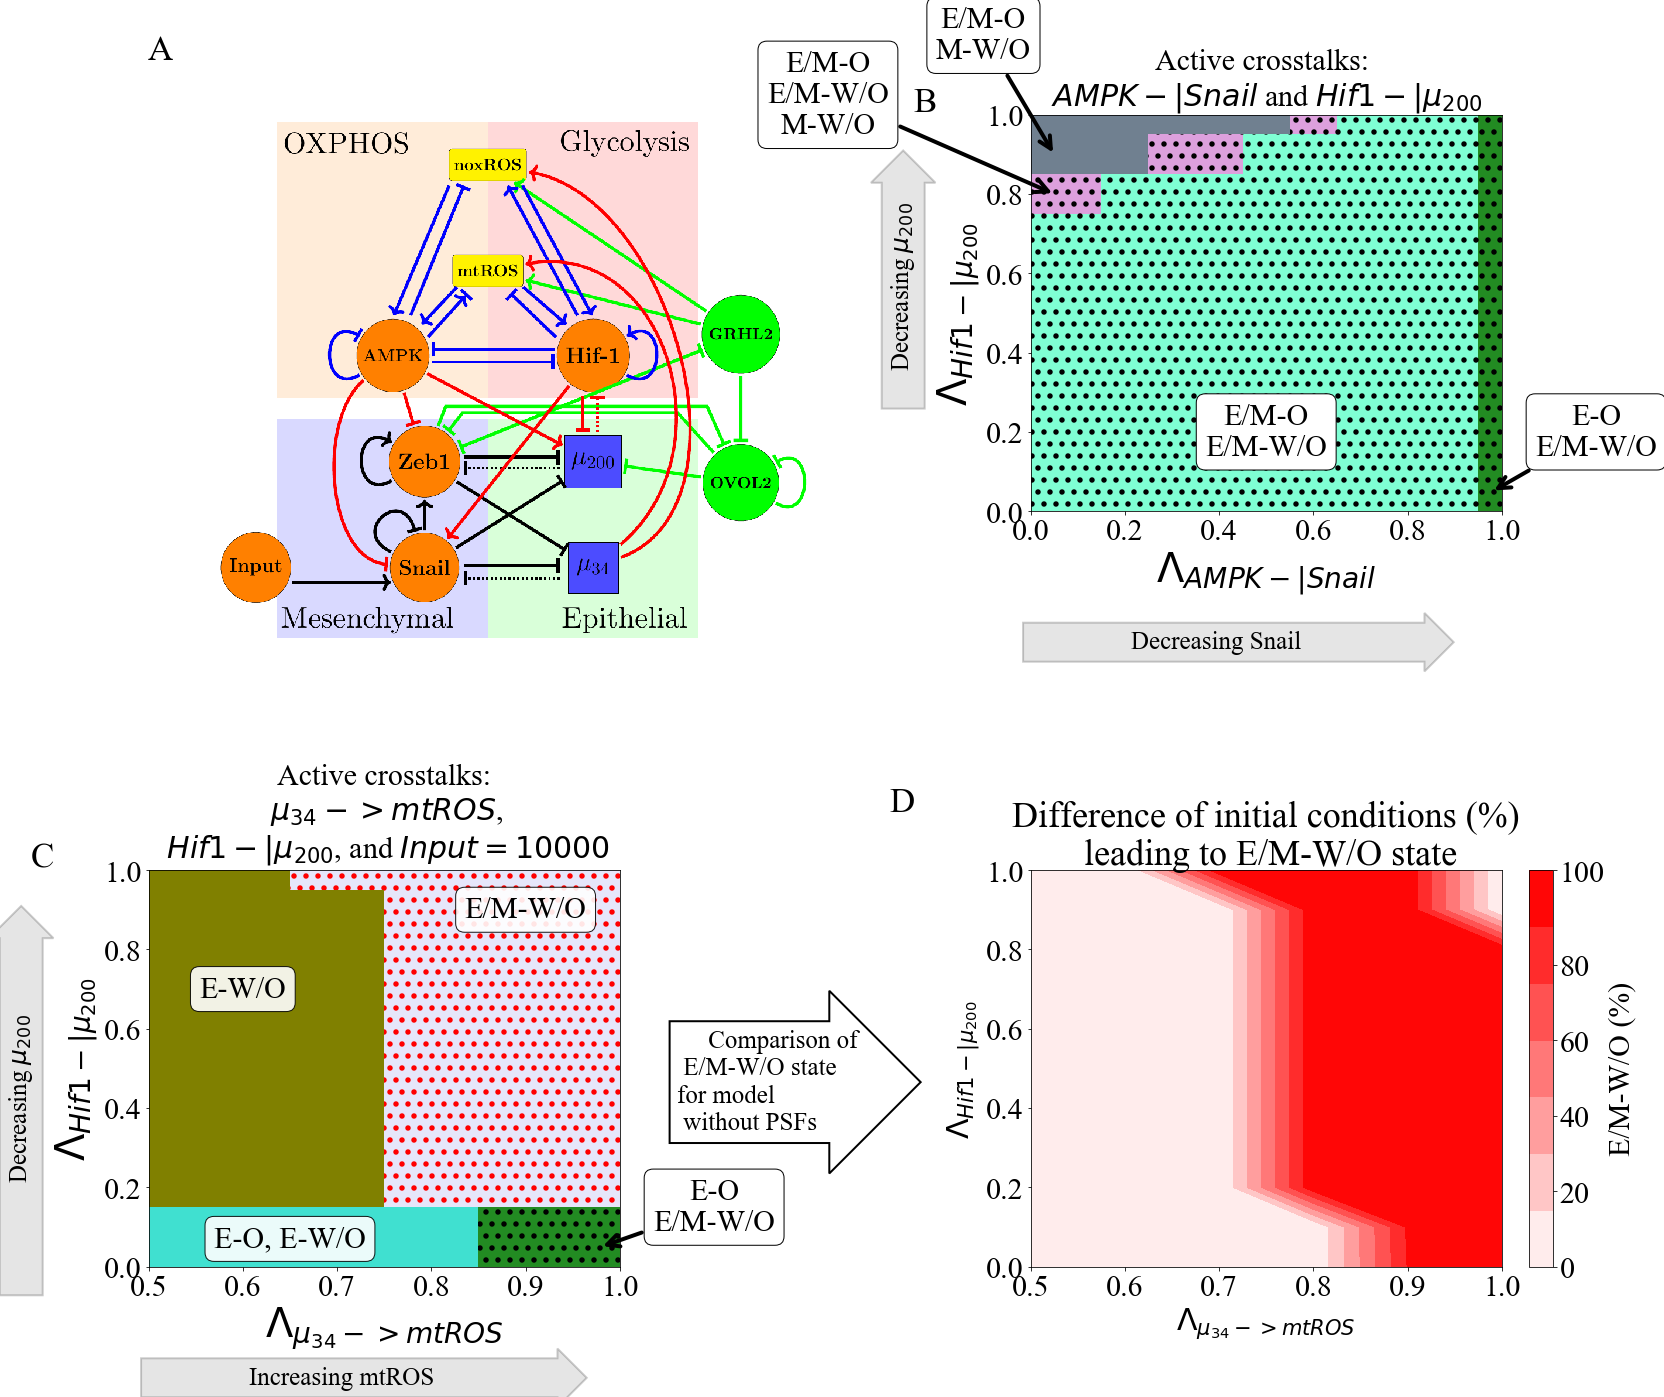

In [53]:
#############
### a1 = u3m
### b2 = HS
### B4 =  AS
### c1 = Hu, u3m, input=10000
### C2 = AS, Hu
fig = plt.figure(figsize=(10,8))
c1,c2=0.7,0.3
c3=0.4
c4,c5=0.3,0.4
gs1 = gridspec.GridSpec(4,6, height_ratios=[1.,0.3,0.5,1], width_ratios=[1,0.5,0.3,1,0.01,0.05])
gs1.update(left=0.05, right=2., wspace=0.05,hspace=0.05,top=2.,bottom=0)
fs =30
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})

##########
###################
ax6a = plt.subplot(gs1[0:2,0:2])
ax6a.text(-0.05, 1.15, 'A',transform=ax6a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
img = Image.open('network_psf.png')
#img.resize((8000,8000))
a = np.asarray(img)
ax6a.imshow(a)
ax6a.axis("off")


##########
#############
ax6e = plt.subplot(gs1[0,3])
plotPhases(ax6e,'B','data_6c2',"$\Lambda_{AMPK-|Snail}$","$\Lambda_{Hif1-|\mu_{200}}$",legend=False,xlim=[0.,1],ylim=[0.,1],fs=fs)

ax6e.annotate('E-O\nE/M-W/O', fontsize=30,xy=(0.98, 0.05), xycoords="data",xytext=(1.2,0.2), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax6e.annotate('E/M-O\nE/M-W/O', fontsize=30,xy=(0.5, 0.2), xycoords="data",xytext=(0.5,0.2), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax6e.annotate('E/M-O\nM-W/O', fontsize=30,xy=(0.05, 0.9), xycoords="data",xytext=(-.1,1.2), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax6e.annotate('E/M-O\nE/M-W/O\nM-W/O', fontsize=30,xy=(0.05, 0.8), xycoords="data",xytext=(-.43,1.05), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
t=ax6e.text(0., -0.3, "                Decreasing Snail                     ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
t=ax6e.text(-0.3, 0.85, "     Decreasing $\mu_{200}$     ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=90)
ax6e.text(.5,1.16,"Active crosstalks: \n$AMPK -| Snail$ and $Hif1-|\mu_{200}$",
          transform=ax6e.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs)

############
ax6d = plt.subplot(gs1[3,0])
plotPhases(ax6d,'C','data_6c1',"$\Lambda_{\mu_{34}->mtROS}$","$\Lambda_{Hif1-|\mu_{200}}$",xlim=[0.5,1],ylim=[0,1],legend=False,switchX=False,fs=fs)

ax6d.annotate('E-O\nE/M-W/O', fontsize=30,xy=(0.98, 0.05), xycoords="data",xytext=(1.1,.15), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax6d.annotate('E/M-W/O', fontsize=30,xy=(0.9,0.9), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",alpha=0.9))
ax6d.annotate('E-W/O', fontsize=30,xy=(0.6,0.7), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",alpha=0.9))
ax6d.annotate('E-O, E-W/O', fontsize=30,xy=(0.65,0.07), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",alpha=0.9))

t=ax6d.text(0.5, -0.25, "                Increasing mtROS                     ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
t=ax6d.text(0.35, 0.85, "                 Decreasing $\mu_{200}$              ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=90)
ax6d.text(.5,1.26,"Active crosstalks:\n $\mu_{34}->mtROS$, \n $Hif1 -| \mu_{200}$, and $Input=10000$",
          transform=ax6d.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs)

ax6d = plt.subplot(gs1[3,3])
ax6e = plt.subplot(gs1[3,5])
plotEMWOheatmap_diff(ax6d,ax6e,fig,'','data_6c1_1',xlim=[0.5,1],ylim=[0,1])
ax6d.text(0.35,1.15,"D",fontsize=fs+5)
ax6d.set_xlabel("$\Lambda_{\mu_{34}->mtROS}$")
ax6d.set_ylabel("$\Lambda_{Hif1-|\mu_{200}}$")
ax6d.set_title("Difference of initial conditions (%)\n leading to E/M-W/O state")
t=ax6d.text(0.125, 0.6, "     Comparison of\n E/M-W/O state\nfor model\n without PSFs     ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="w", ec="k", lw=2,alpha=1),rotation=0)
fig.savefig("Figure8.png",bbox_inches='tight')#,dpi=300)